# Insurance Claim Classifier 

In this project, data is orthonormalized. KNearestNeighbors and NearestNeighbors algorithms are used to predict the likelihood of fraud of an insurance claim.

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.neighbors import NearestNeighbors as NN
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

## 1. EDA

In [37]:
# Load the data
frauds = pd.read_csv('Fraud.csv')

In [38]:
# Inspect the data
frauds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 8 columns):
CASE_ID            5960 non-null int64
FRAUD              5960 non-null int64
TOTAL_SPEND        5960 non-null int64
DOCTOR_VISITS      5960 non-null int64
NUM_CLAIMS         5960 non-null int64
MEMBER_DURATION    5960 non-null int64
OPTOM_PRESC        5960 non-null int64
NUM_MEMBERS        5960 non-null int64
dtypes: int64(8)
memory usage: 372.6 KB


In [39]:
frauds.head()

,CASE_ID,FRAUD,TOTAL_SPEND,DOCTOR_VISITS,NUM_CLAIMS,MEMBER_DURATION,OPTOM_PRESC,NUM_MEMBERS
0,1,1,1100,11,0,94,1,2
1,2,1,1300,7,2,122,0,1
2,3,1,1500,4,0,149,1,3
3,4,1,1500,9,0,180,1,1
4,5,0,1700,3,0,93,0,1


In [41]:
# Trim-off the CASE_ID
frauds = frauds.drop(['CASE_ID'], axis = 1)

frauds.describe()

,FRAUD,TOTAL_SPEND,DOCTOR_VISITS,NUM_CLAIMS,MEMBER_DURATION,OPTOM_PRESC,NUM_MEMBERS
count,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000
mean,0.199497,18607.969799,8.941107,0.405705,179.615268,1.170134,1.985738
std,0.399656,11207.480417,7.232345,1.079256,82.076572,1.653866,0.996873
min,0.000000,1100.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,11100.000000,3.000000,0.000000,117.000000,0.000000,1.000000
50%,0.000000,16300.000000,8.000000,0.000000,178.000000,1.000000,2.000000
75%,0.000000,23300.000000,12.000000,0.000000,227.000000,2.000000,3.000000
max,1.000000,89900.000000,41.000000,15.000000,660.000000,17.000000,8.000000


### Percent of investigations are found to be fraudulent

In [60]:
print("Total number of entries:", frauds.shape[0])
print("Total number of FRAUD entries:", np.sum(fraud_data['FRAUD']))
print("Percent of investigations are found to be fraudulent:",frauds.groupby('FRAUD').size()[1]/frauds.shape[0])

Total number of entries: 5960
Total number of FRAUD entries: 1189
Percent of investigations are found to be fraudulent: 0.199496644295302


### Visualize the distribution of the features

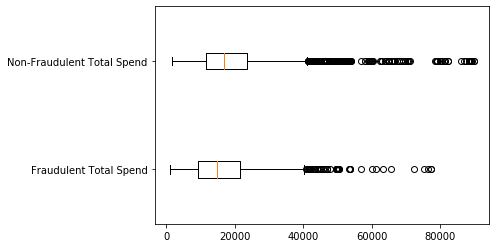

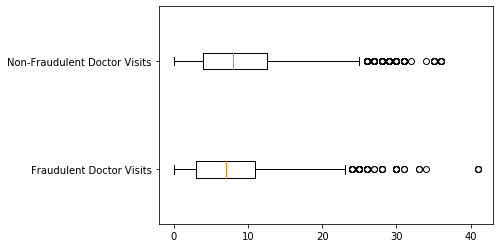

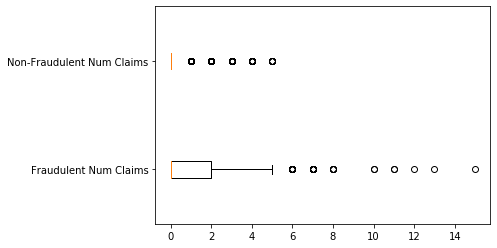

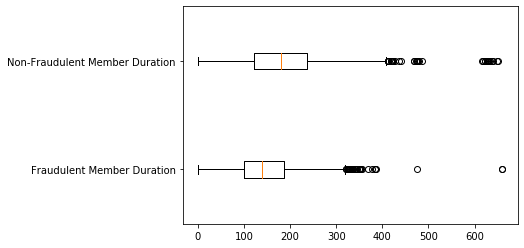

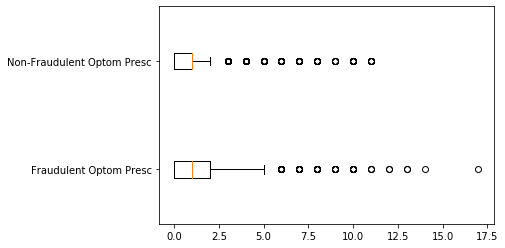

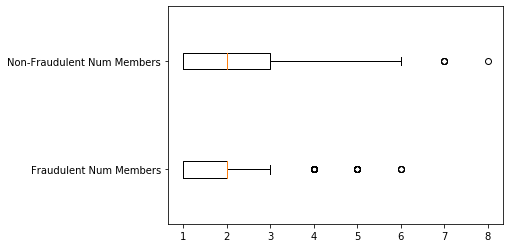

In [15]:
fraudulent_obs = fraud_data[fraud_data['FRAUD']==1]
fraudulent_obs = fraudulent_obs[['TOTAL_SPEND', 'DOCTOR_VISITS', 'NUM_CLAIMS',\
                                 'MEMBER_DURATION', 'OPTOM_PRESC', 'NUM_MEMBERS']]

non_fraudulent_obs = fraud_data[fraud_data['FRAUD']==0]
non_fraudulent_obs = non_fraudulent_obs[['TOTAL_SPEND', 'DOCTOR_VISITS', 'NUM_CLAIMS',\
                                 'MEMBER_DURATION', 'OPTOM_PRESC', 'NUM_MEMBERS']]
# Total spend
plt.figure()
plt.boxplot([fraudulent_obs['TOTAL_SPEND'], non_fraudulent_obs['TOTAL_SPEND']],\
            labels=['Fraudulent Total Spend', 'Non-Fraudulent Total Spend'], vert=False)
plt.show()

# Doctor visits
plt.figure()
plt.boxplot([fraudulent_obs['DOCTOR_VISITS'], non_fraudulent_obs['DOCTOR_VISITS']],\
            labels=['Fraudulent Doctor Visits', 'Non-Fraudulent Doctor Visits'], vert=False)
plt.show()

# Num claims
plt.figure()
plt.boxplot([fraudulent_obs['NUM_CLAIMS'], non_fraudulent_obs['NUM_CLAIMS']],\
            labels=['Fraudulent Num Claims', 'Non-Fraudulent Num Claims'], vert=False)
plt.show()

# Member duration
plt.figure()
plt.boxplot([fraudulent_obs['MEMBER_DURATION'], non_fraudulent_obs['MEMBER_DURATION']],\
            labels=['Fraudulent Member Duration', 'Non-Fraudulent Member Duration'], vert=False)
plt.show()

# Optom presc
plt.figure()
plt.boxplot([fraudulent_obs['OPTOM_PRESC'], non_fraudulent_obs['OPTOM_PRESC']],\
            labels=['Fraudulent Optom Presc', 'Non-Fraudulent Optom Presc'], vert=False)
plt.show()

# Num Members
plt.figure()
plt.boxplot([fraudulent_obs['NUM_MEMBERS'], non_fraudulent_obs['NUM_MEMBERS']],\
            labels=['Fraudulent Num Members', 'Non-Fraudulent Num Members'], vert=False)
plt.show()

### Normalize the feature values

In [93]:
# Orthonormalized the fraud data
X = frauds.loc[:, frauds.columns != 'FRAUD']
X = np.matrix(X.values)
XTX = X.transpose() * X

# Eigenvalue decompostion
evals, evecs = np.linalg.eigh(XTX)

# Create transformation matrix
transf = evecs * np.linalg.inv(np.sqrt(np.diagflat(evals)));

# Transform x
X = X * transf

# Split the orthonormalized data into train and test
y = frauds['FRAUD']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, stratify = y)

# Split the standardized data into train and test
scaler = StandardScaler()
X_scaled = scaler.fit_transform(frauds.loc[:, frauds.columns != 'FRAUD'])
X_scaled = pd.DataFrame(X_scaled, columns=frauds.columns[1:])
y_scaled = y
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test =\
                                            train_test_split(X_scaled, y_scaled, train_size = 0.8, stratify = y)

## 2. Build NearestNeightbors Model

### Build KNearestNeighborsClassifier

In [94]:
# Find the best K in the stadardized data
for i in range(1, 11):
    classifier = KNC(n_neighbors=i, algorithm='brute', metric='euclidean').fit(X_scaled_train, y_scaled_train)
    print("K =", i, "Test accuracy:", accuracy_score(y_scaled_test, classifier.predict(X_scaled_test)))

K = 1 Test accuracy: 0.8104026845637584
K = 2 Test accuracy: 0.8296979865771812
K = 3 Test accuracy: 0.8288590604026845
K = 4 Test accuracy: 0.8364093959731543
K = 5 Test accuracy: 0.822986577181208
K = 6 Test accuracy: 0.8380872483221476
K = 7 Test accuracy: 0.8338926174496645
K = 8 Test accuracy: 0.8330536912751678
K = 9 Test accuracy: 0.8338926174496645
K = 10 Test accuracy: 0.8305369127516778


The best K = 6 for the standardized data.

In [78]:
# Find the best K in the orthonormalized data
for i in range(1, 11):
    classifier = KNC(n_neighbors=i, algorithm='brute', metric='euclidean').fit(X_train, y_train)
    print("K =", i, "Test accuracy:", accuracy_score(y_test, classifier.predict(X_test)))

K = 1 Test accuracy: 0.8062080536912751
K = 2 Test accuracy: 0.8364093959731543
K = 3 Test accuracy: 0.822986577181208
K = 4 Test accuracy: 0.8271812080536913
K = 5 Test accuracy: 0.8263422818791947
K = 6 Test accuracy: 0.8330536912751678
K = 7 Test accuracy: 0.8338926174496645
K = 8 Test accuracy: 0.8364093959731543
K = 9 Test accuracy: 0.8322147651006712
K = 10 Test accuracy: 0.834731543624161


The best K = 2 for the orthonormalized data. Comparing to the standardized classifier, the orthonormalized one has computer advantages.

In [95]:
# The optimal K = 2
classifier = KNC(n_neighbors=2, algorithm='brute', metric='euclidean').fit(X_train, y_train)
classifier.score(X_test, y_test)

0.837248322147651

### Build NearestNeighbors

In [98]:
# Specify the NN with 5 neighbors
neigh = NN(n_neighbors=5, algorithm='brute', metric='euclidean')

# Build nearest neighbors
neigh = neigh.fit(X)
indices = neigh.kneighbors(X, return_distance=False)
print(indices[:10])

[[   0   25  149  322  582]
 [   1  773 1161  184   66]
 [   2  171   70  380  437]
 [   3   51   63  159  186]
 [   4   26  117  153   62]
 [   5   85  673 1172 1621]
 [   6  327  100 1075 1176]
 [   7   83  277  363  386]
 [   8  739 1714 1176 2992]
 [   9  995  635  589  835]]


## 3. Predict the class of the focal data

In [101]:
# Find the nearest neighbors of this focal observation
focal = [[7500, 15, 3, 127, 2, 2]]
# Tansform the focal
focal = focal * transf
print("Transformed input variable values:", focal)

pred_nbrs_idx = neigh.kneighbors(focal, return_distance=False)
print("My Neighbors = \n", pred_nbrs_idx)


Transformed input variable values: [[-0.02886529  0.00853837 -0.01333491  0.0176811   0.00793805  0.0044727 ]]
My Neighbors = 
 [[ 588 2897 1199 1246  886]]


In [104]:
print(fraud_data.iloc[588, :])
print(fraud_data.iloc[2897, :])
print(fraud_data.iloc[1199, :])
print(fraud_data.iloc[1246, :])
print(fraud_data.iloc[886, :])

CASE_ID             589
FRAUD                 1
TOTAL_SPEND        7500
DOCTOR_VISITS        15
NUM_CLAIMS            3
MEMBER_DURATION     127
OPTOM_PRESC           2
NUM_MEMBERS           2
Name: 588, dtype: int64
CASE_ID             2898
FRAUD                  1
TOTAL_SPEND        16000
DOCTOR_VISITS         18
NUM_CLAIMS             3
MEMBER_DURATION      146
OPTOM_PRESC            3
NUM_MEMBERS            2
Name: 2897, dtype: int64
CASE_ID             1200
FRAUD                  1
TOTAL_SPEND        10000
DOCTOR_VISITS         16
NUM_CLAIMS             3
MEMBER_DURATION      124
OPTOM_PRESC            2
NUM_MEMBERS            1
Name: 1199, dtype: int64
CASE_ID             1247
FRAUD                  1
TOTAL_SPEND        10200
DOCTOR_VISITS         13
NUM_CLAIMS             3
MEMBER_DURATION      119
OPTOM_PRESC            2
NUM_MEMBERS            3
Name: 1246, dtype: int64
CASE_ID             887
FRAUD                 1
TOTAL_SPEND        8900
DOCTOR_VISITS        22
NUM_CLAIMS   

In [111]:
# Predict the outcome of the focol
pred = classifier.predict(focal)
print(pred)

[1]


The predicted probability of fraudulent is 1 because 5 out of the 5 nearest neighbors are fraudulent. Therefore, the observation is fraudulent. The predicted value of this observation is 1 which matches the predicted probability of fraudulent, so the observation is not misclassified